# Hierarchical Clustering


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
forest_fire = pd.read_csv(url)

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7
}

forest_fire['month'] = forest_fire['month'].map(month_mapping)
forest_fire['day'] = forest_fire['day'].map(day_mapping)


forest_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Hierachical Clustering on Raw Data

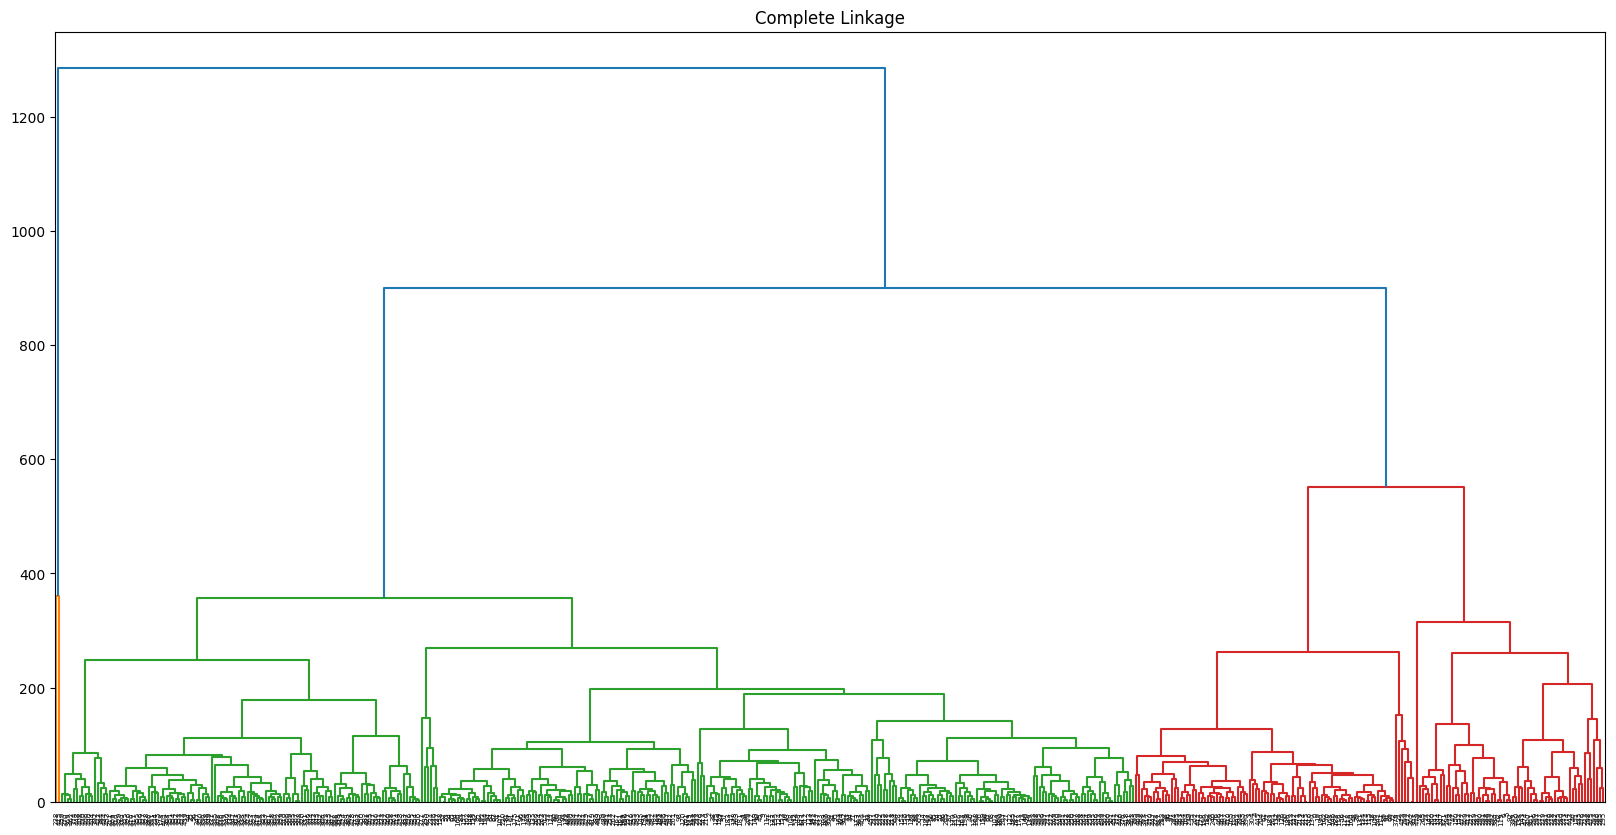

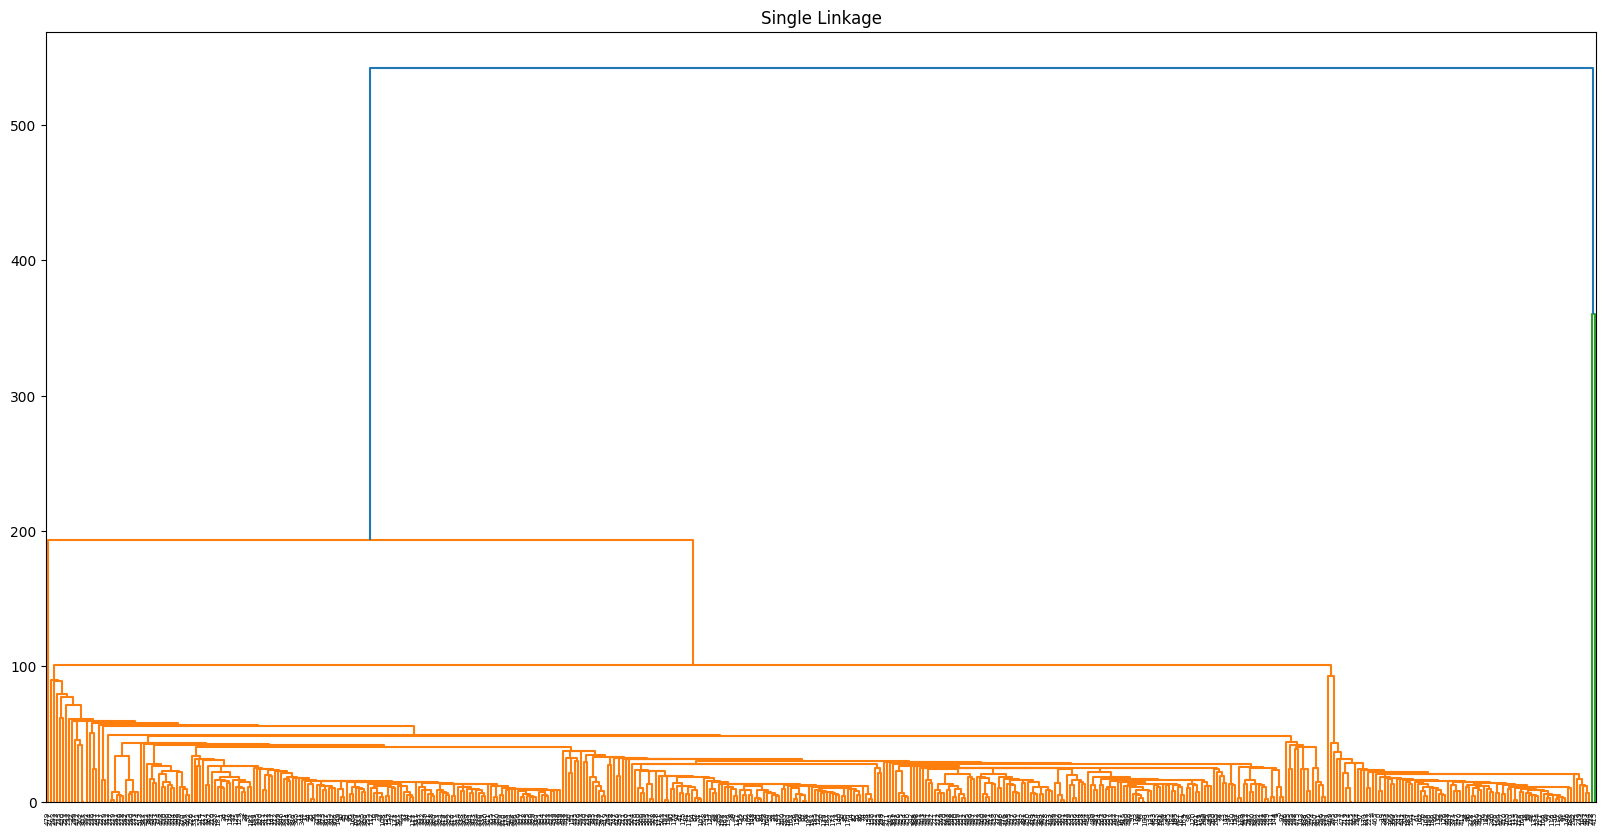

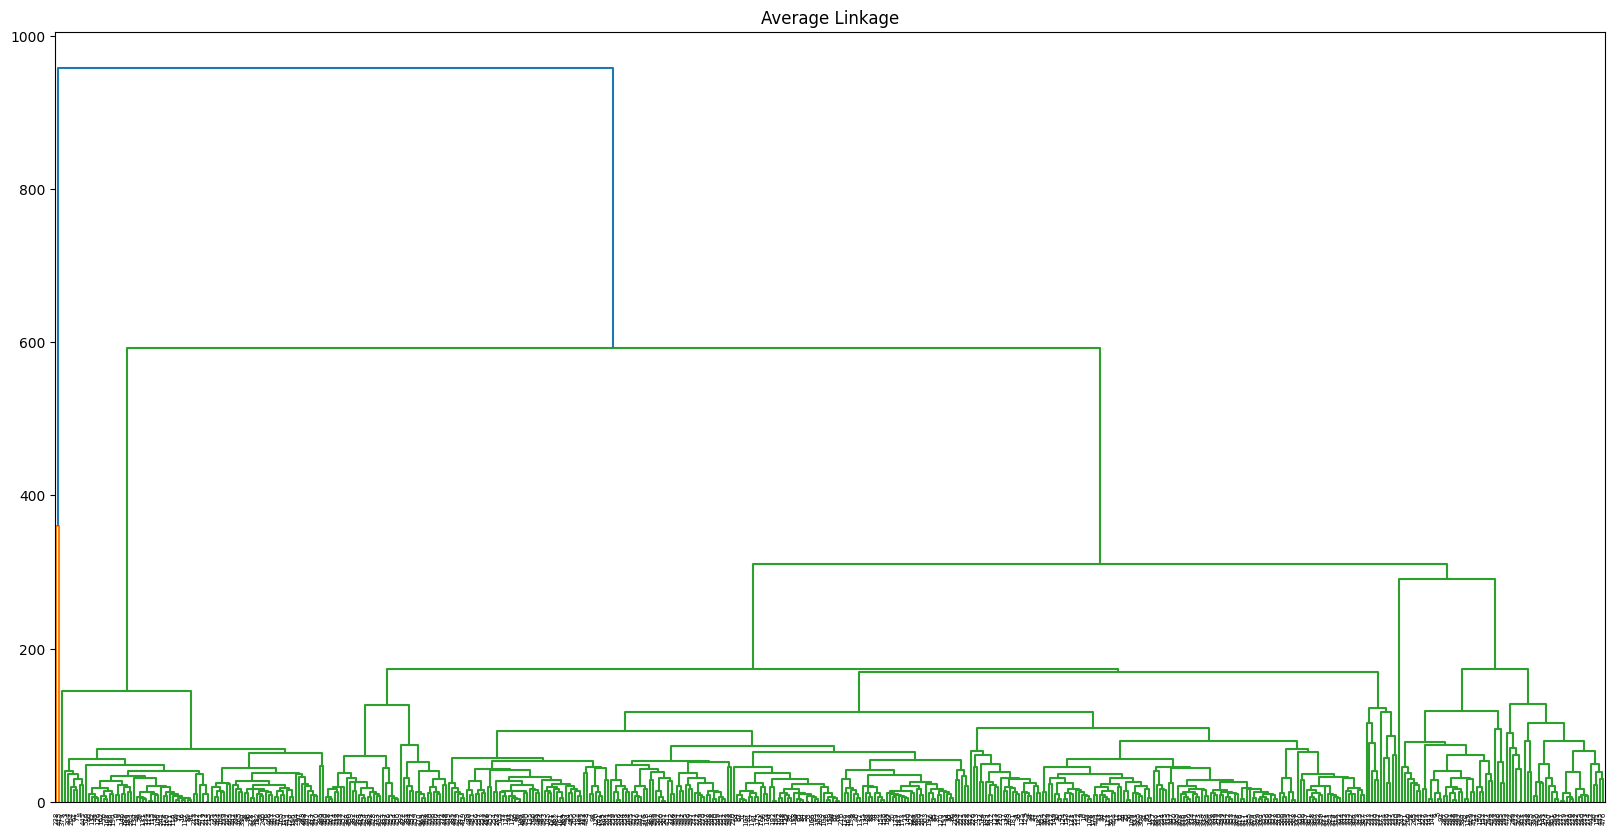

In [3]:
forest_fire_complete = hierarchy.complete(forest_fire)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete)
plt.title('Complete Linkage')

forest_fire_single = hierarchy.single(forest_fire)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single)
plt.title('Single Linkage')

forest_fire_average = hierarchy.average(forest_fire)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average)
plt.title('Average Linkage')

plt.show()

## Transforming/Dropping Columns
-   Dropping spatial coordinates X,Y which may not be directly relevant to clustering based on environmental and fire conditions
-   Apply log transformation to `area` due to high skewness
 

In [4]:
forest_fire_transformed = forest_fire.copy()

forest_fire_transformed['area'] = np.log1p(forest_fire_transformed['area'])
forest_fire_transformed=forest_fire_transformed.drop(['month','day'],axis=1)
forest_fire_transformed=forest_fire_transformed.drop(['X','Y'],axis=1)
forest_fire_transformed.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


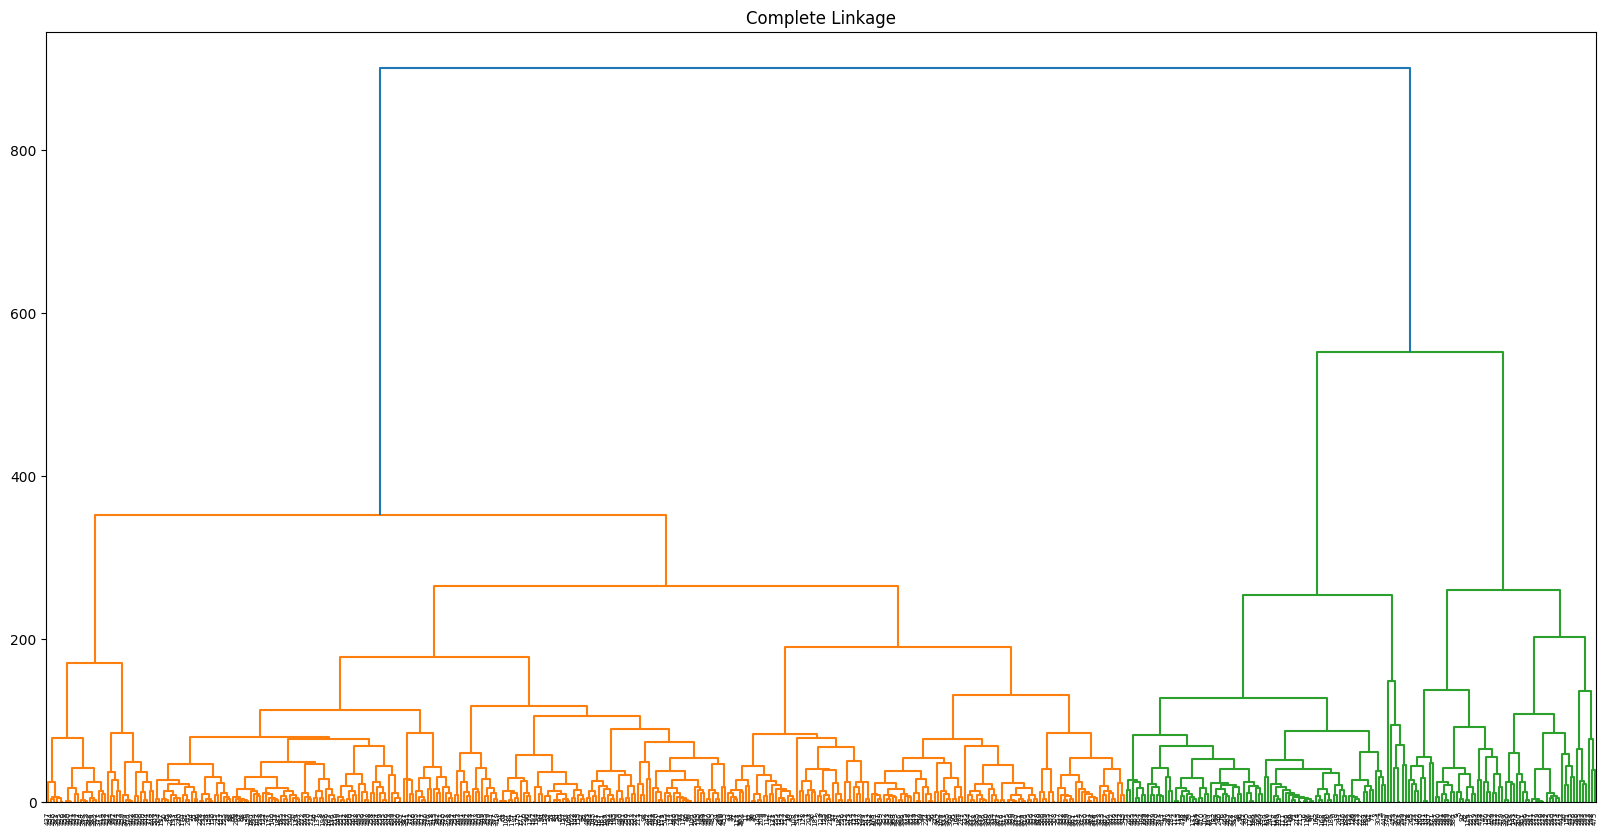

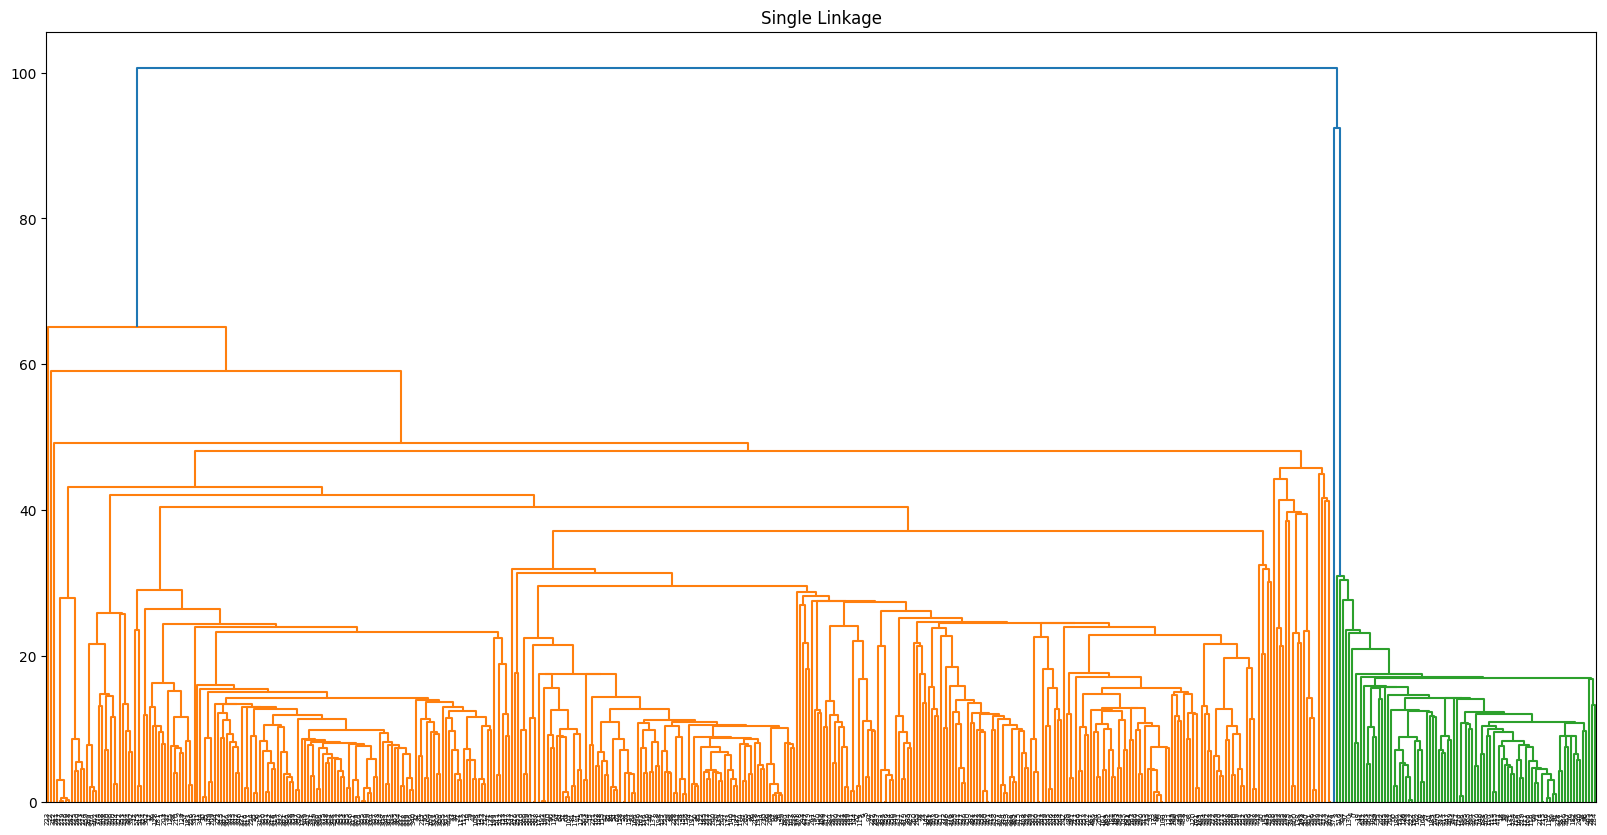

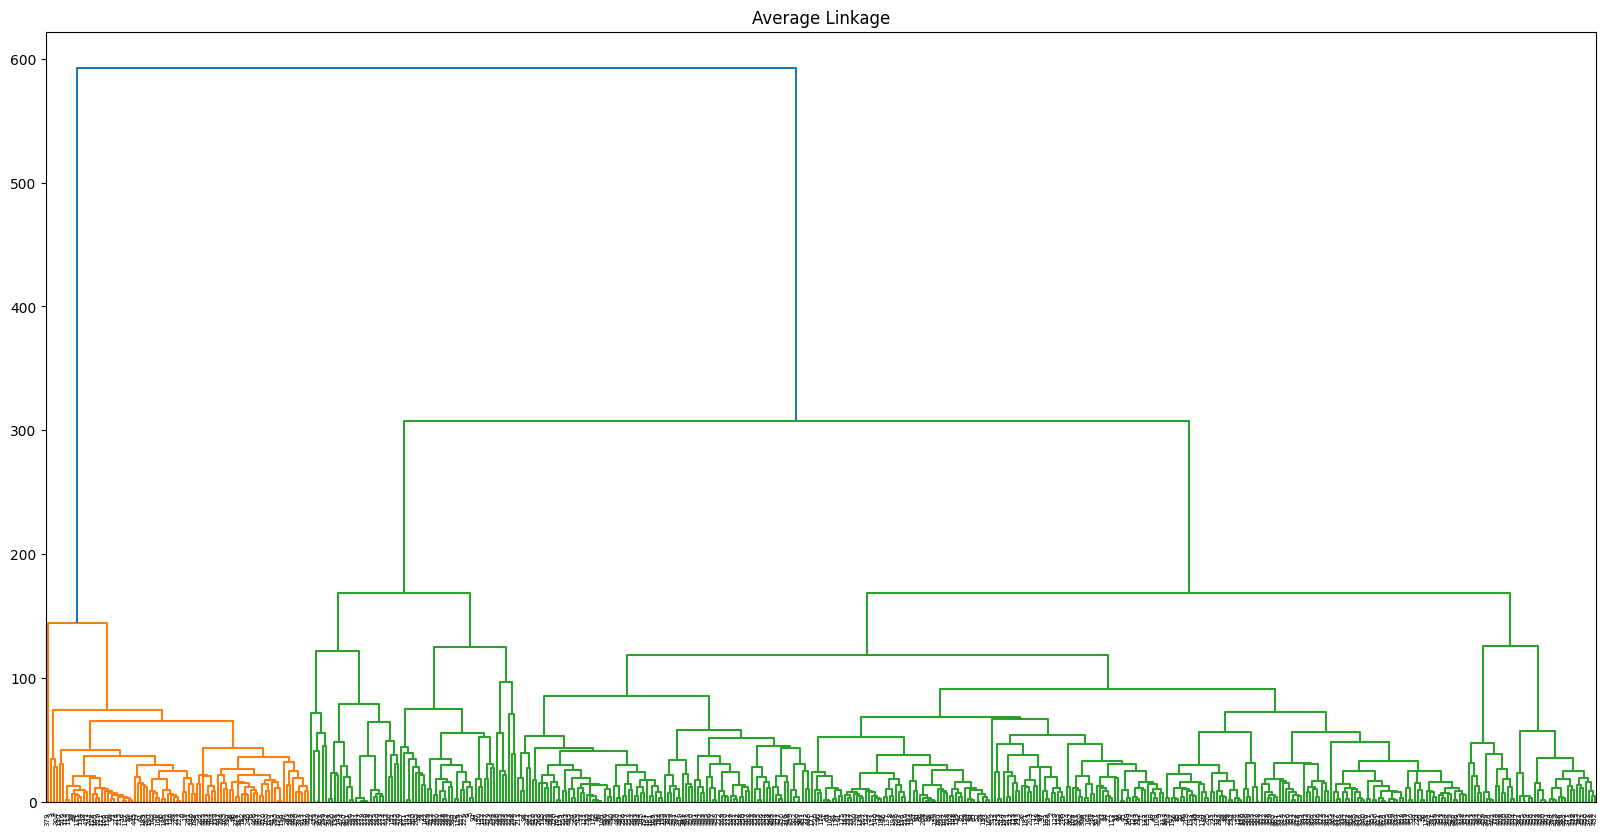

In [5]:
forest_fire_complete = hierarchy.complete(forest_fire_transformed)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete)
plt.title('Complete Linkage')

forest_fire_single = hierarchy.single(forest_fire_transformed)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single)
plt.title('Single Linkage')

forest_fire_average = hierarchy.average(forest_fire_transformed)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average)
plt.title('Average Linkage')

plt.show()

-   Data transformation has dramatically improve our clusterings.

## Standard Scaler
-   Standardize our data to have a mean of 0 and standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
forest_fire_standardized = scaler.fit_transform(forest_fire_transformed)
forest_fire_standardized = pd.DataFrame(forest_fire_standardized, columns=forest_fire_transformed.columns)
forest_fire_standardized.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.795247
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.795247
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.795247
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.795247
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.795247


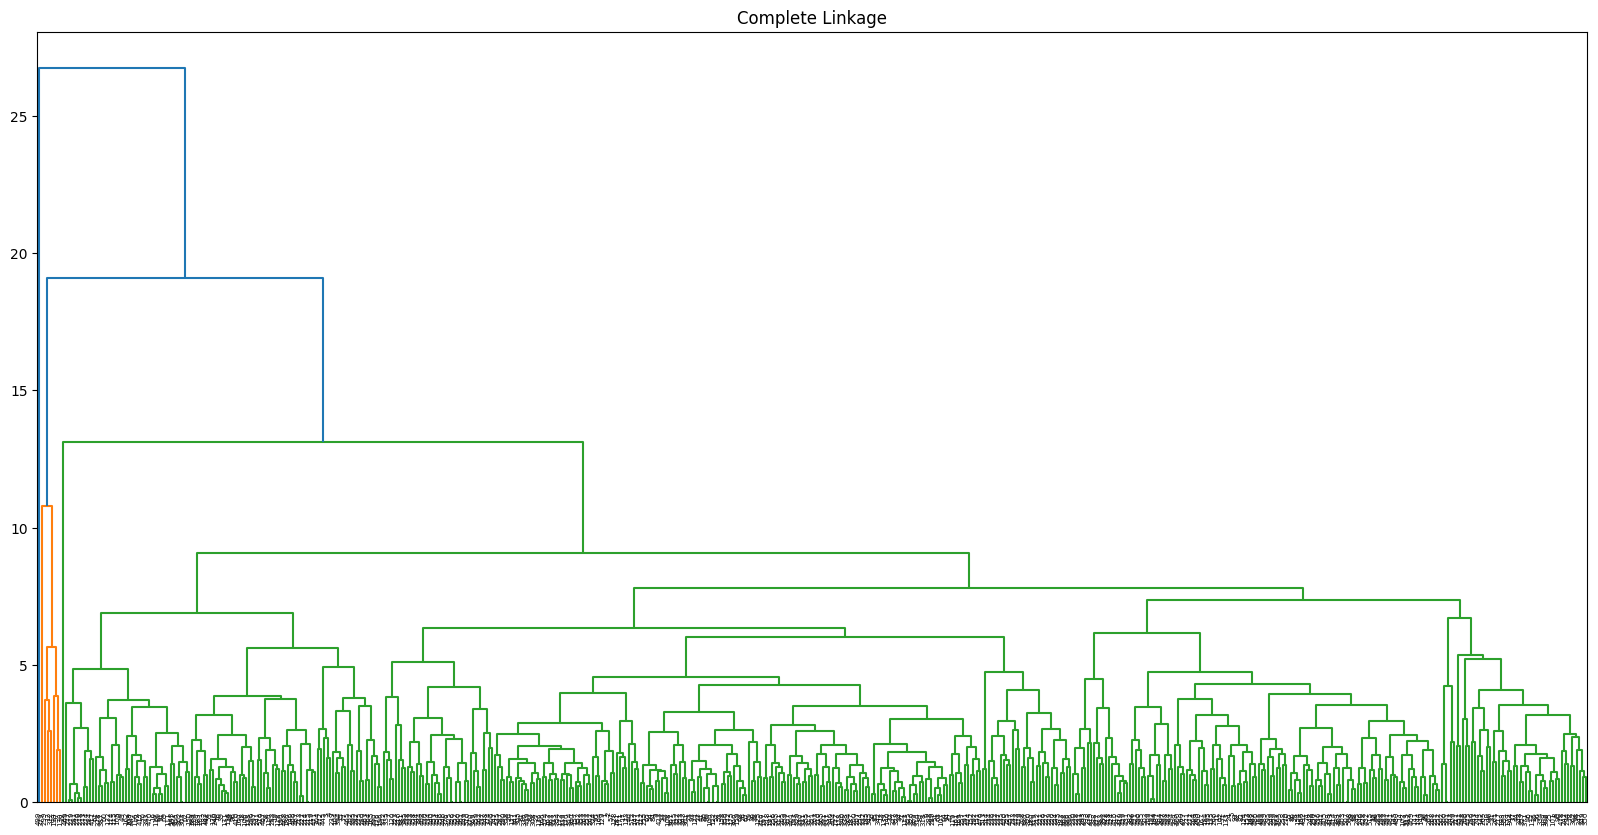

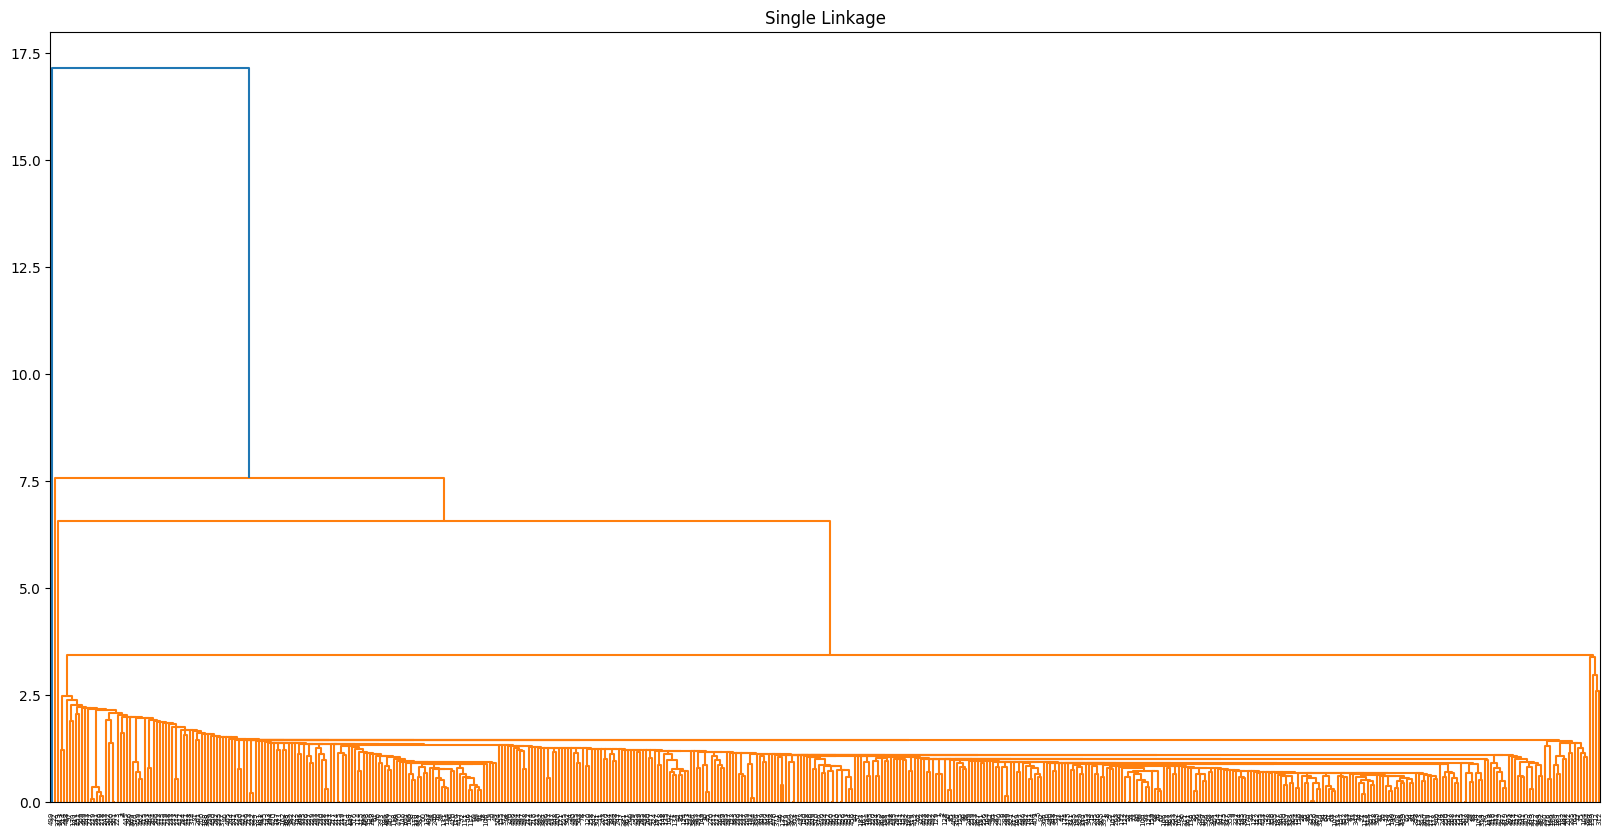

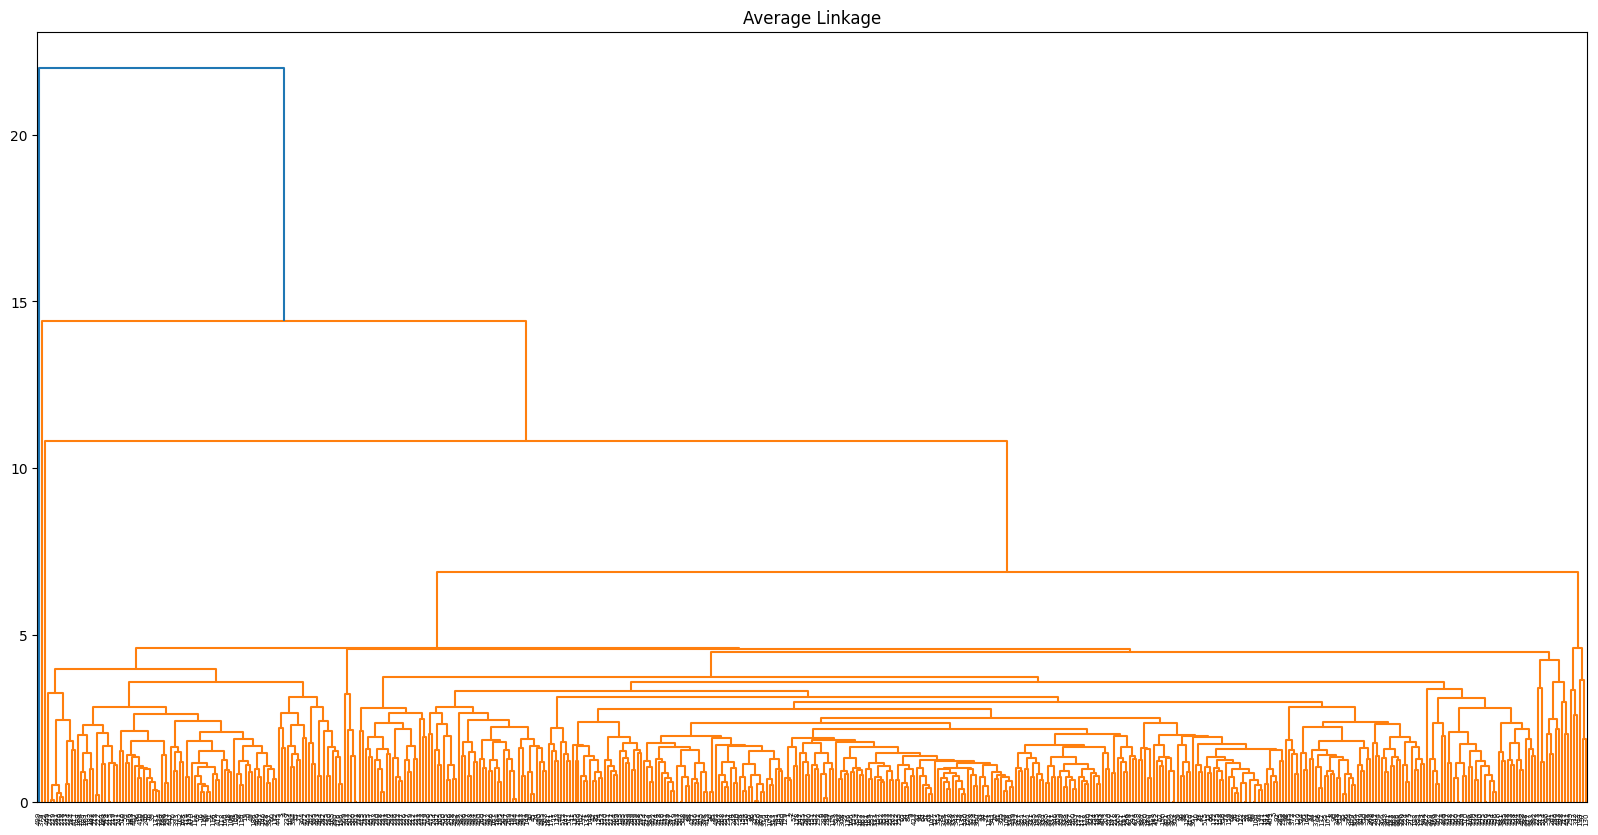

In [7]:
forest_fire_standardized_complete = hierarchy.complete(forest_fire_standardized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_standardized_complete)
plt.title('Complete Linkage')

forest_fire_standardized_single = hierarchy.single(forest_fire_standardized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_standardized_single)
plt.title('Single Linkage')

forest_fire_standardized_average = hierarchy.average(forest_fire_standardized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_standardized_average)
plt.title('Average Linkage')

plt.show()

## MinMax Scaler
-    Normalizing our raw data to have all features in a range of [0,1]

In [8]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
forest_fire_normalized = min_max_scaler.fit_transform(forest_fire_transformed)
forest_fire_normalized = pd.DataFrame(forest_fire_normalized, columns=forest_fire_transformed.columns)
forest_fire_normalized.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


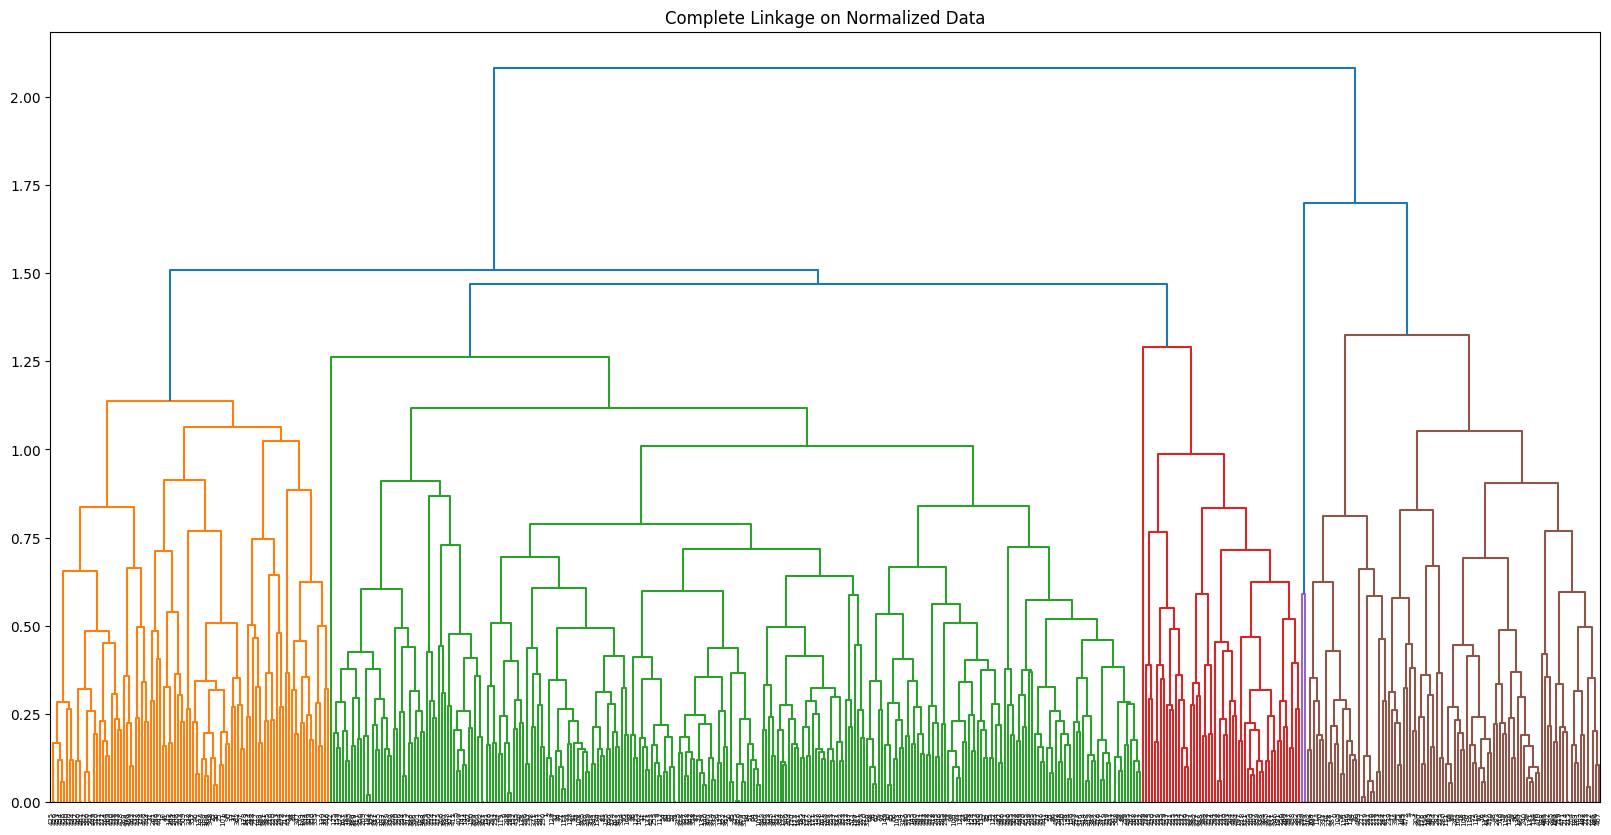

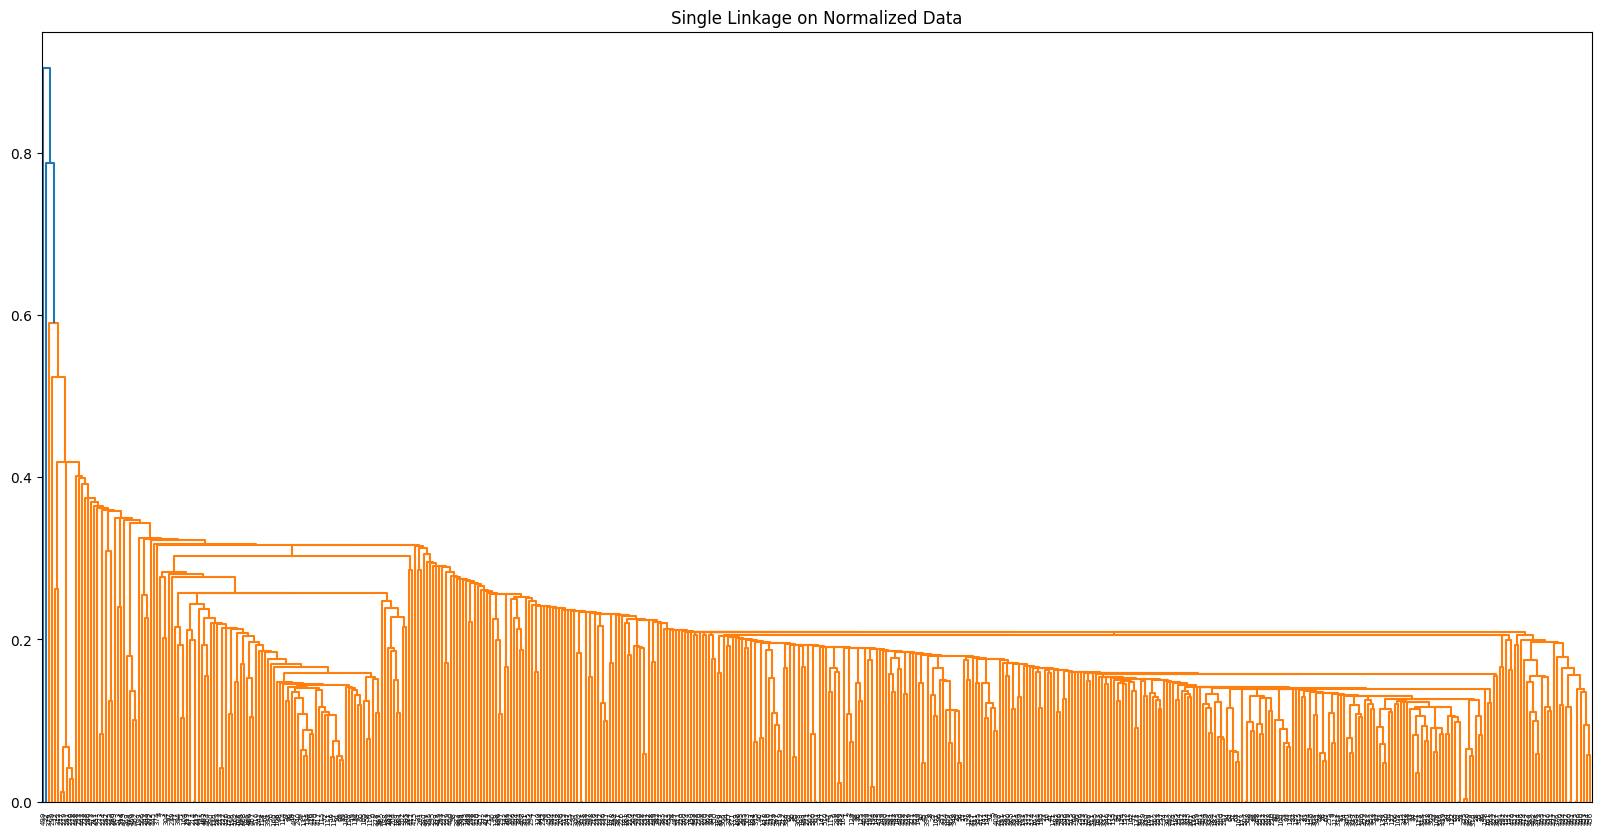

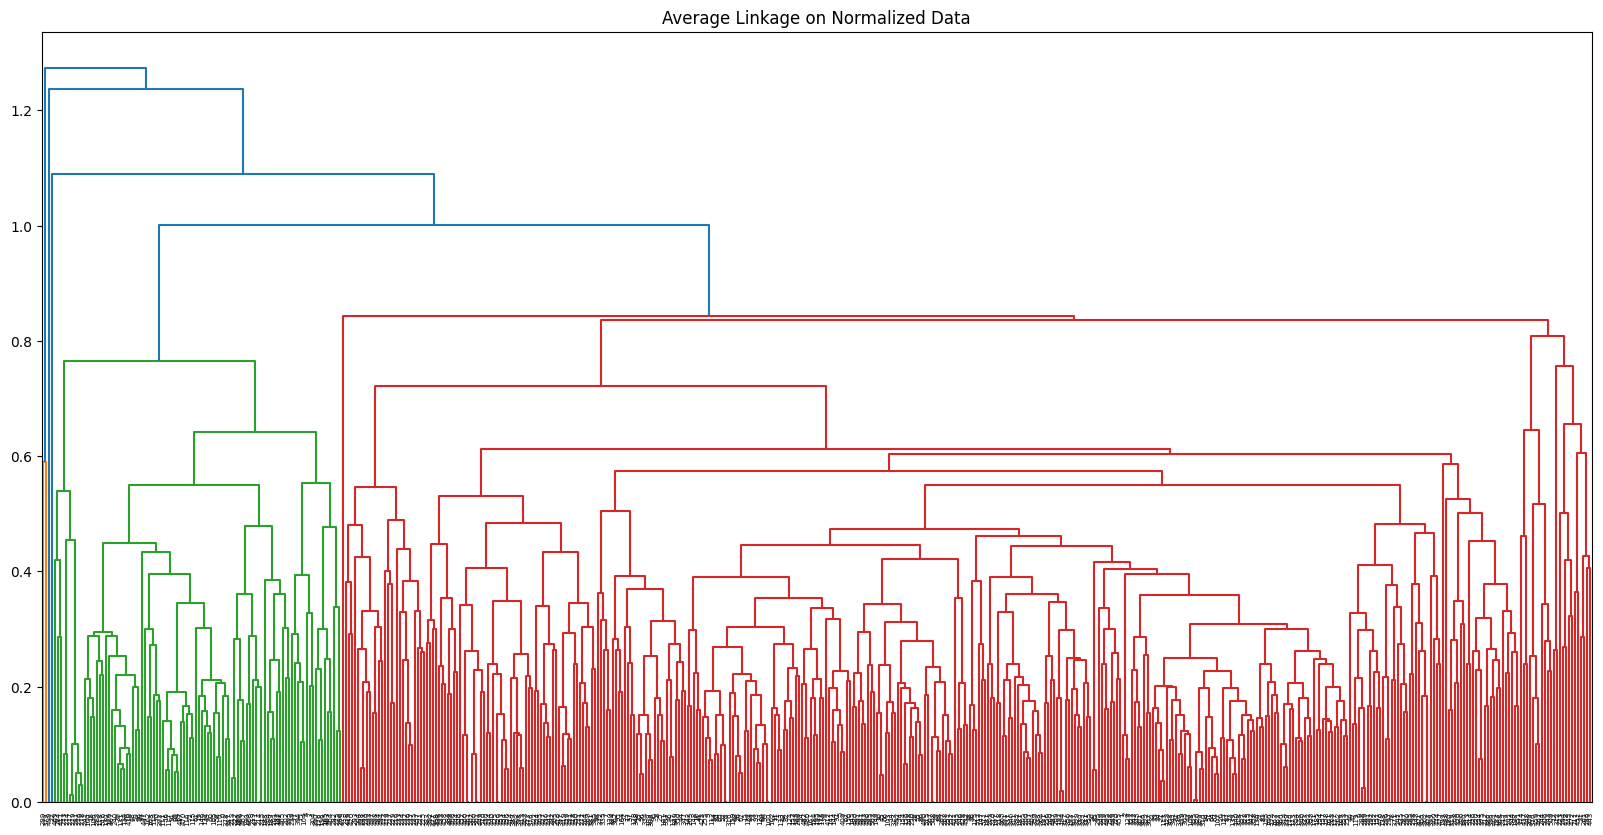

In [9]:
forest_fire_complete_normalized = hierarchy.complete(forest_fire_normalized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete_normalized)
plt.title('Complete Linkage on Normalized Data')

forest_fire_single_normalized = hierarchy.single(forest_fire_normalized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single_normalized)
plt.title('Single Linkage on Normalized Data')

forest_fire_average_normalized = hierarchy.average(forest_fire_normalized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average_normalized)
plt.title('Average Linkage on Normalized Data')

plt.show()

## PCA

In [10]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # You can change the number of components
forest_fire_pca = pca.fit_transform(forest_fire_transformed)

# Convert the result to a DataFrame for better readability
forest_fire_pca = pd.DataFrame(forest_fire_pca, columns=['PC1', 'PC2'])
forest_fire_pca.head()

,PC1,PC2
0,-461.613985,-1.726608
1,105.644449,-96.511457
2,124.603142,-91.624116
3,-476.906858,10.983131
4,-449.360948,24.338194


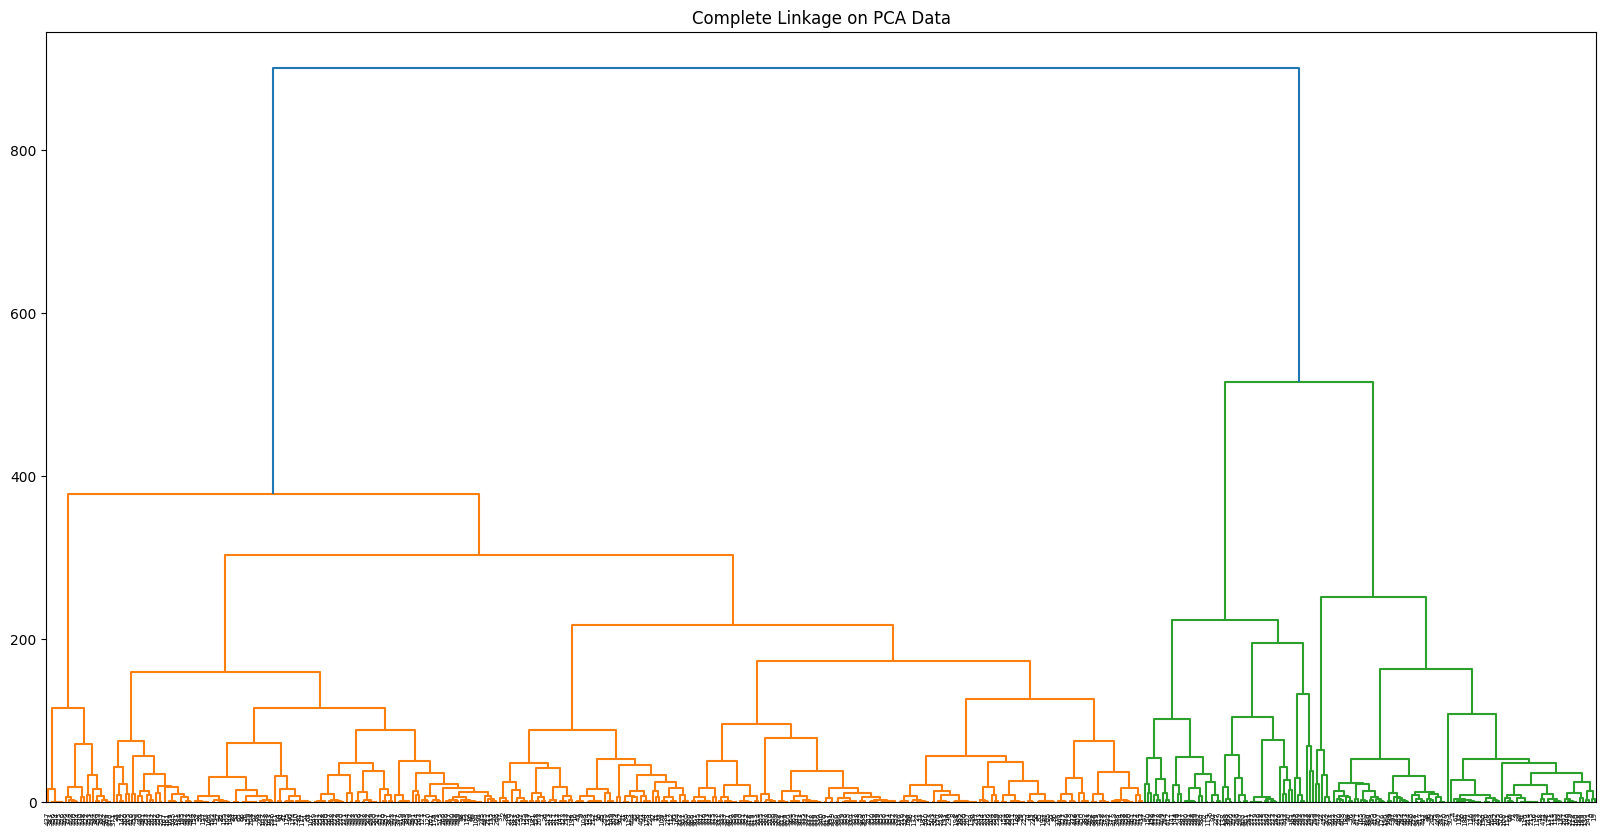

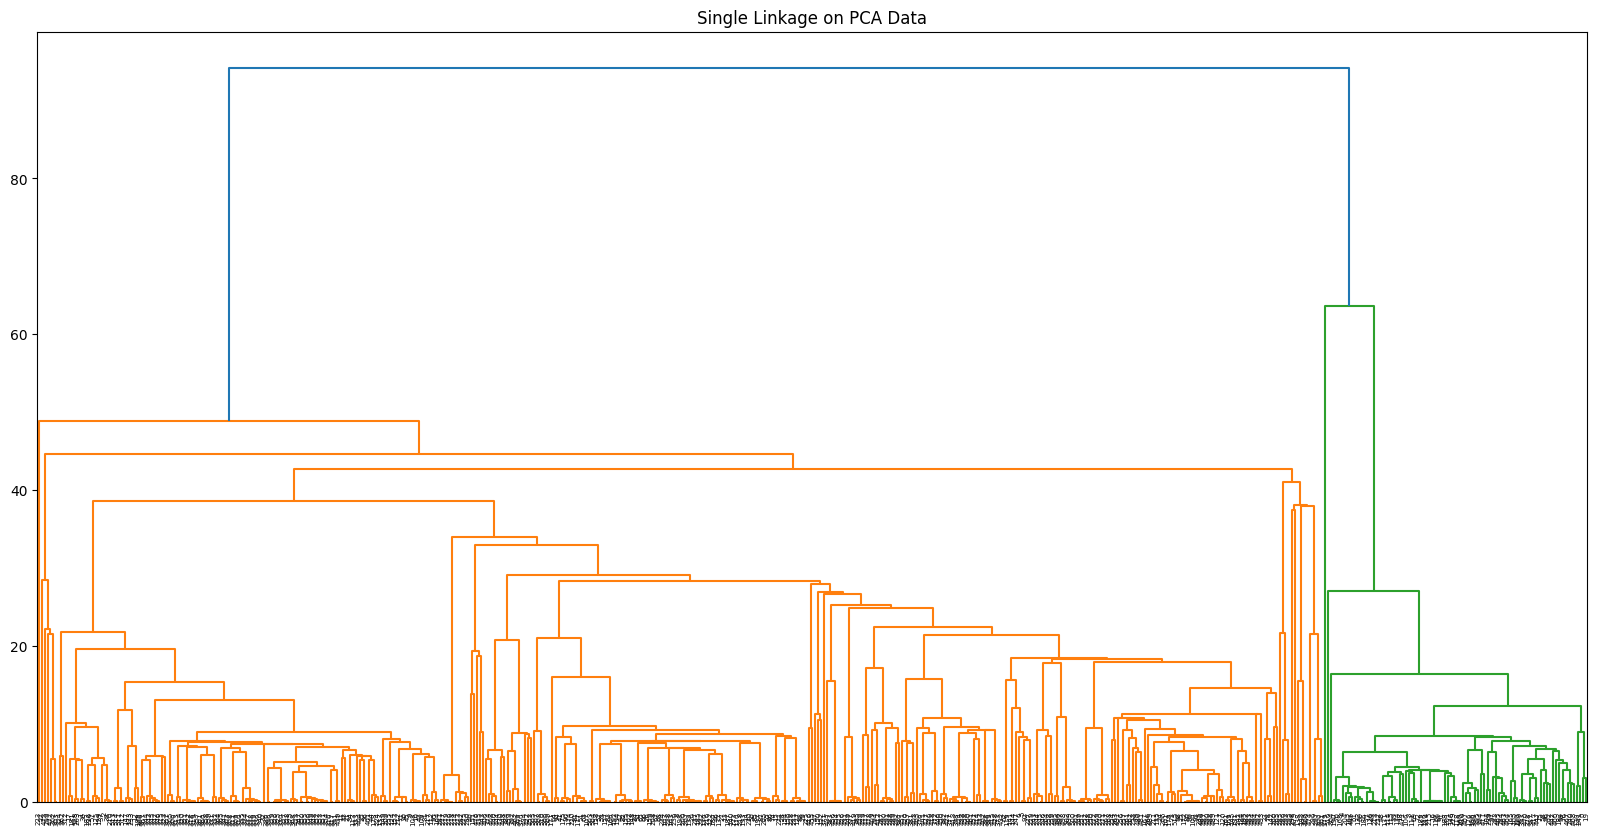

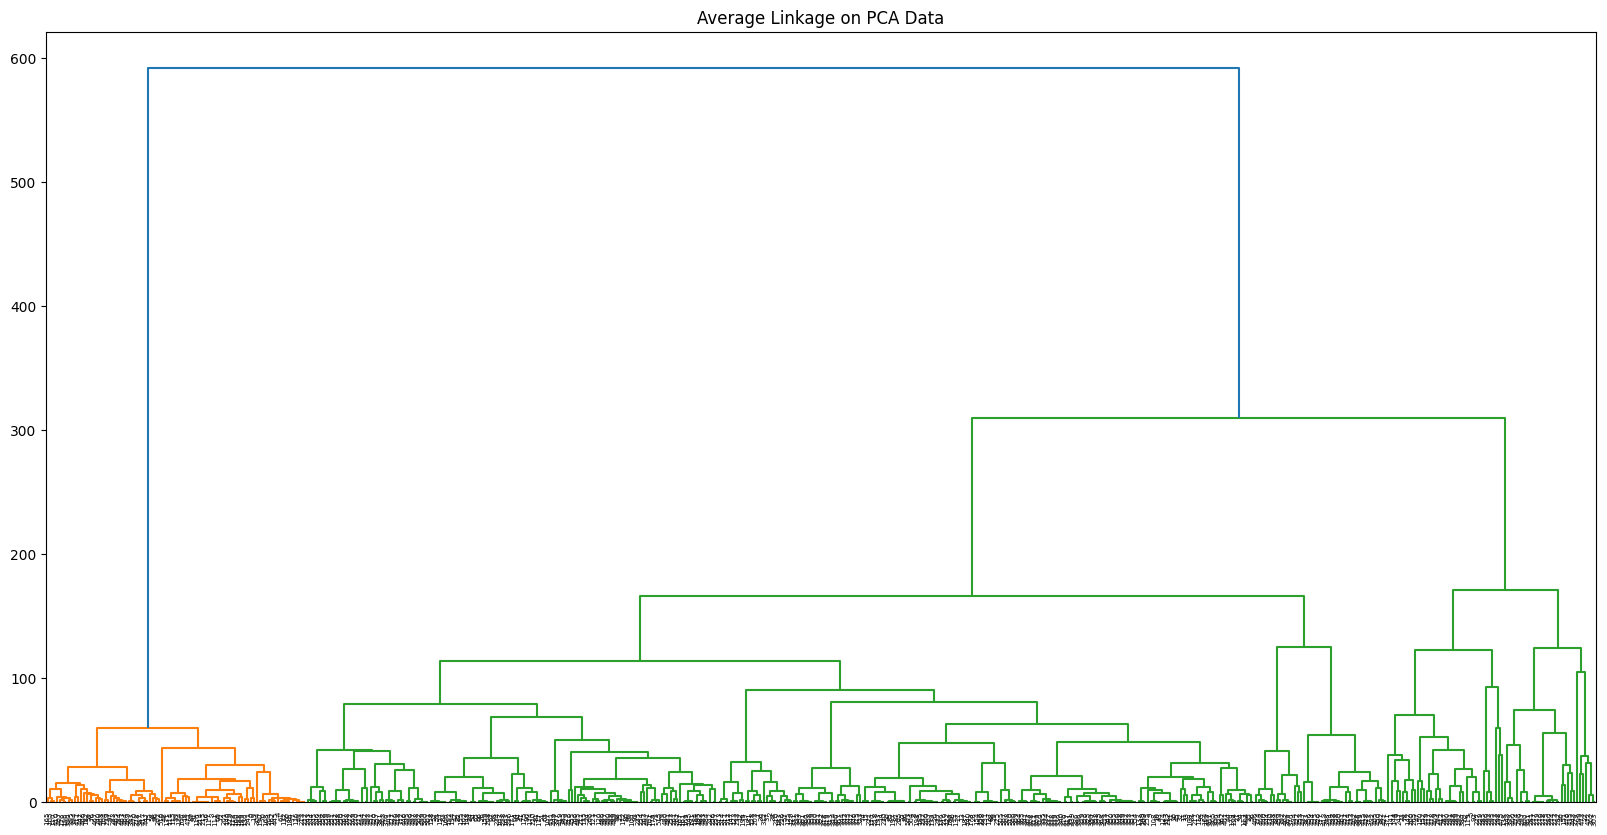

In [11]:
forest_fire_complete_pca = hierarchy.complete(forest_fire_pca)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete_pca)
plt.title('Complete Linkage on PCA Data')

forest_fire_single_pca = hierarchy.single(forest_fire_pca)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single_pca)
plt.title('Single Linkage on PCA Data')

forest_fire_average_pca = hierarchy.average(forest_fire_pca)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average_pca)
plt.title('Average Linkage on PCA Data')

plt.show()

[1 2 2 1 1 0 0 0 2 2 2 2 2 2 2 2 1 2 1 1 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 0 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 1 1 1 1 0 2 2 2 2 2 2 1 1 2 1 0
 2 1 1 1 0 0 0 2 2 2 2 2 2 2 2 1 2 1 0 0 2 2 1 1 0 0 0 0 2 2 1 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 0 0 0 2 2 2 2 1 2 2 2 1 1 1 2 1 0 2 2 0 2 2 0 0 0 0 0 1 2
 2 2 0 0 0 2 2 2 2 2 2 2 1 0 1 2 2 1 2 0 1 0 2 2 0 2 2 2 1 2 2 0 2 2 1 2 0
 2 1 2 1 1 1 0 2 2 2 0 1 2 2 2 2 1 1 2 1 2 0 2 2 2 2 0 2 1 1 1 2 2 2 1 2 2
 1 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 1 1 1 0 2 2 2 2 0 2 2 2 2 2 0 0 2 0 0 2
 2 0 0 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 1 1 0 2 2 2 2 2 2 1 2 2 1 2 2 1 1 1 2 2 2 0 0 2 2 2 2 2 2
 1 2 0 1 1 0 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 0
 2 1 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 

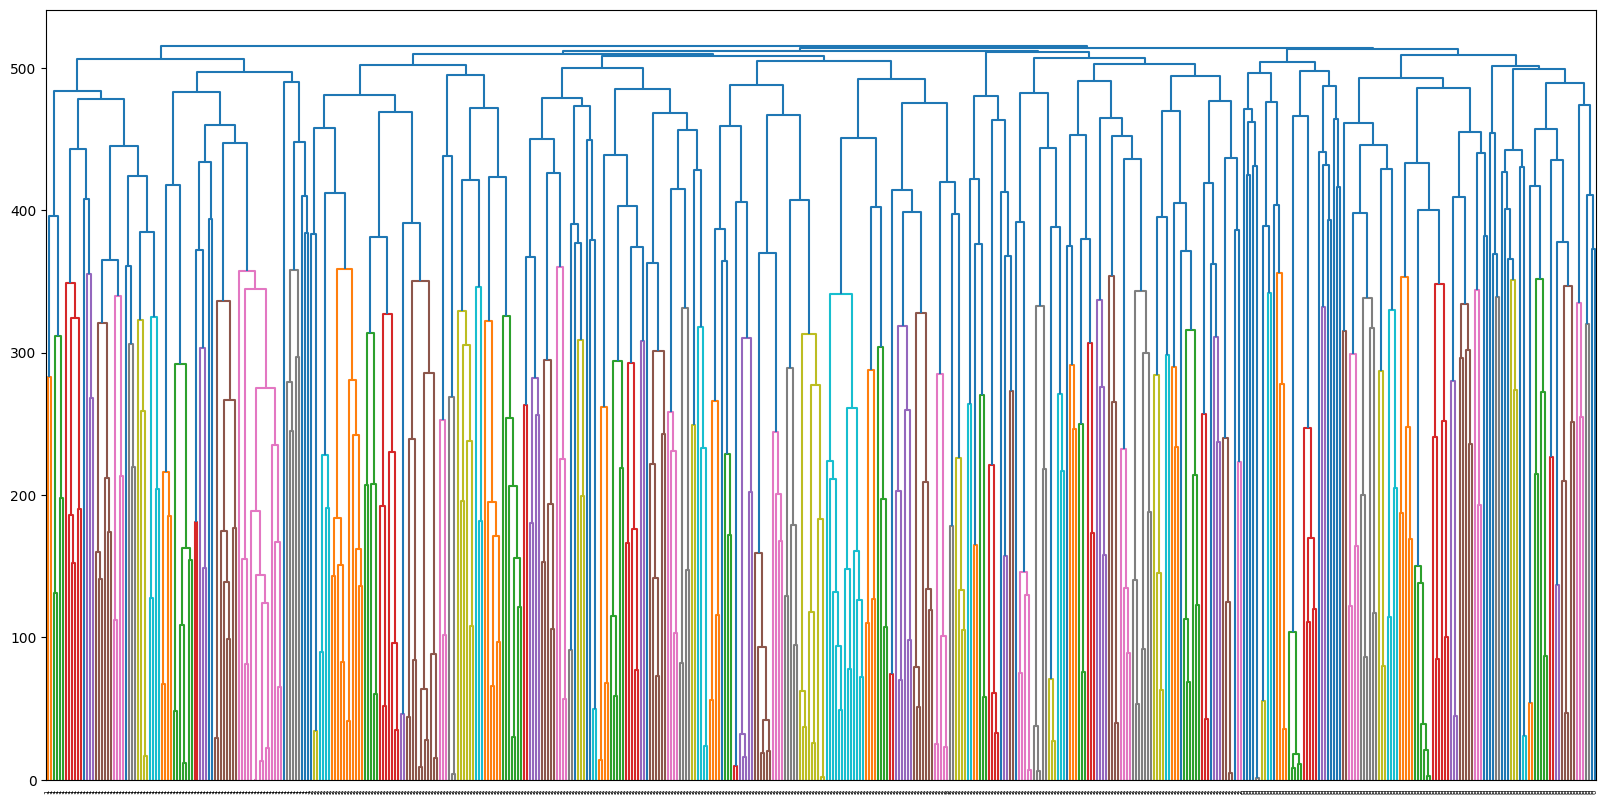

In [12]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
c = AgglomerativeClustering(3).fit(forest_fire_transformed)

fig = plt.figure(figsize=(20, 10))
plot_dendrogram(c, labels=c.labels_)
print(c.labels_)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

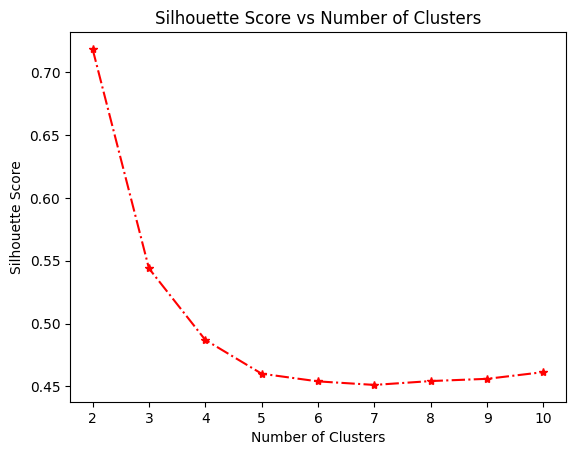

In [13]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [AgglomerativeClustering(n_clusters=k).fit(forest_fire_transformed.values) for k in k_range]
sscores = [silhouette_score(forest_fire_transformed.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")